# PFRA 

### _Development Notebook_
--- 

### QA/QC
#### Global Errors Check

This notebook is intended to identify global issues in a model simulation that require follow-up responses from the modeler before the model can be used in *STARRII* PFRA studies.

Global issues currently implemented include:
 
 __1. Check Model inputs__
 
    A. Plan Information
    B. Plan Parameters
    C. Boundary Conditions 
     
__2. Check Results for each domain (2D Flow Area) in the model__
 
    A. Computational Summary & Depth Plots
    B. Domain Extents
    C. High Velocities at cell faces
 
 
Global issues *in development* include:
 - Mapping areas where Courant number exceeds indicated threshold.
 - Mapping areas where iteration counts exceed indicated threshold.

In [16]:
#model_s3path = "s3://pfra/DC/P01/H06/E0001/DC_P01_H06_E0001_out.zip"
#hecrasio_path = r'C:\Users\Administrator\Desktop\hecrasio'

In [17]:
import sys;sys.path.append(hecrasio_path)
import gdal
from hecrasio.core import *
from hecrasio.qaqc import *
from hecrasio.s3tools import *
from IPython.display import display, HTML
import scrapbook as sb

In [18]:
global_errors=[]

#### Read model output data 

*from AWS*

In [19]:
model = ResultsZip(model_s3path, pfra=True, require_prj=False)

In [20]:
try:
    hdfResults_path = pull_result_paths(model)
except AssertionError as e:
    global_errors.append(str(e))
    print(e)
    

In [20]:
try:
    rasPlan = HDFResultsFile(model, model_s3path, hdfResults_path)
except:
    error = 'Failed to read RAS plan: rasPlan error'
    global_errors.append(error)
    print(error)

### 1A. Plan Information

In [11]:
try:
    sb.glue(rasPlan.Plan_Information.to_json(), "json")
    rasPlan.Plan_Information
    display(HTML(rasPlan.Plan_Information.to_html()))
except:
    error = 'Failed to glue Plan Information'
    global_errors.append(error)
    print(error)

,Results
Base Output Interval,1HOUR
Computation Time Step Base,10SEC
Flow Filename,DC_P01_H00.u04
Flow Title,E0001
Geometry Filename,DC_P01_H00.g04
Geometry Title,DC_P01
Plan Filename,DC_P01_H00.p05
Plan Name,DC_P01
Plan ShortID,DC_P01
Plan Title,DC_P01


### 1B. Plan Parameters

In [12]:
try:
    sb.glue(rasPlan.Plan_Parameters.to_json(), "json")
    display(HTML(rasPlan.Plan_Parameters.to_html()))
except:
    error = 'Failed to glue Plan Parameters'
    global_errors.append(error)
    print(error)

,Results
1D Cores,0
1D Methodology,Finite Difference
1D2D Flow Tolerance,0.1
1D2D MaxIter,0
1D2D Minimum Flow Tolerance,1
1D2D WS Tolerance,0.01
2D Boundary Condition Ramp Up Fraction,"[0.1, 0.1]"
2D Boundary Condition Volume Check,"[b'False', b'False']"
2D Cores,0
2D Coriolis,False


### 1C. Boundary Conditions 

#### Input hydrographs

C:\Users\Administrator\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)
C:\Users\Administrator\Anaconda3\lib\site-packages\geopandas\plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Domain ID: D02, Average Cell Size = 100.0


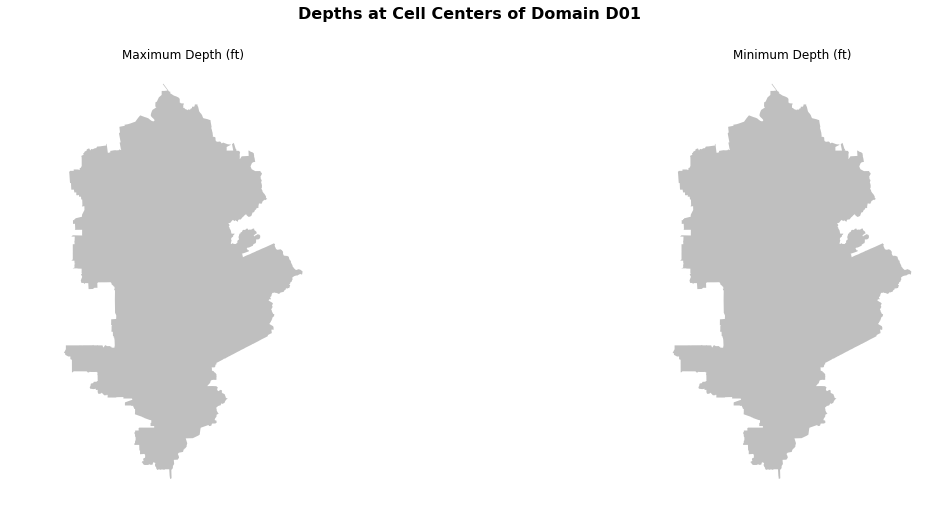

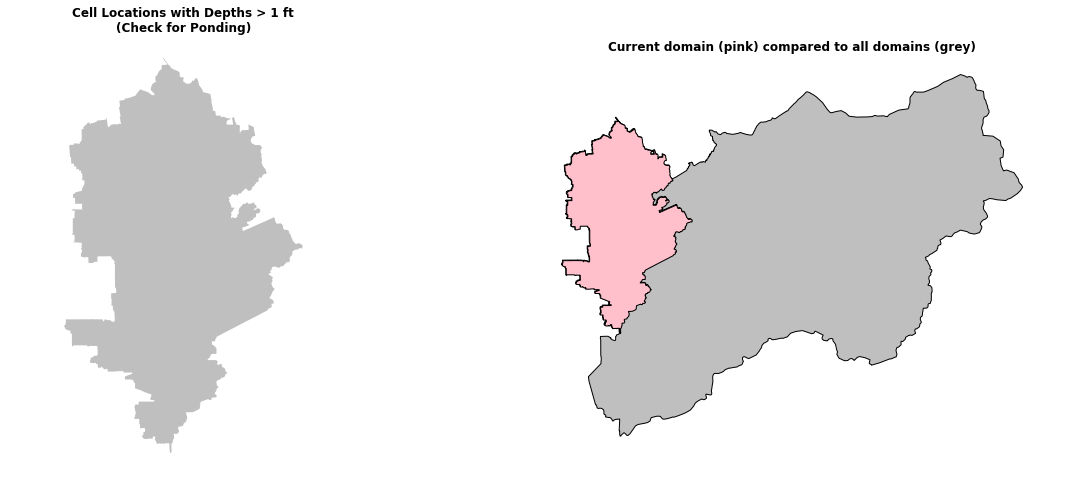

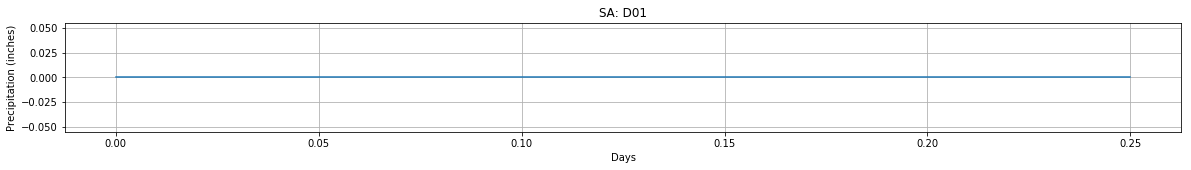

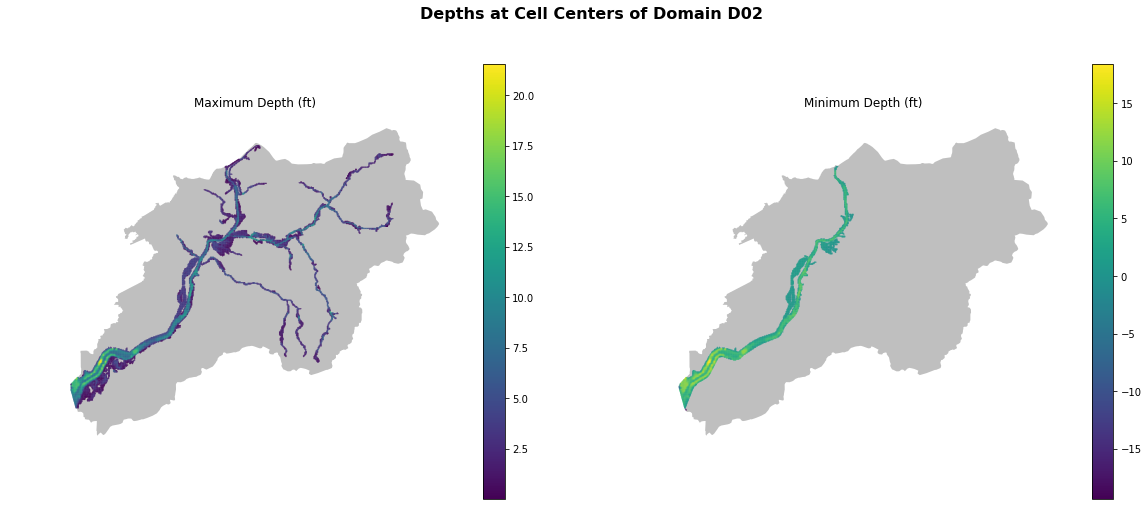

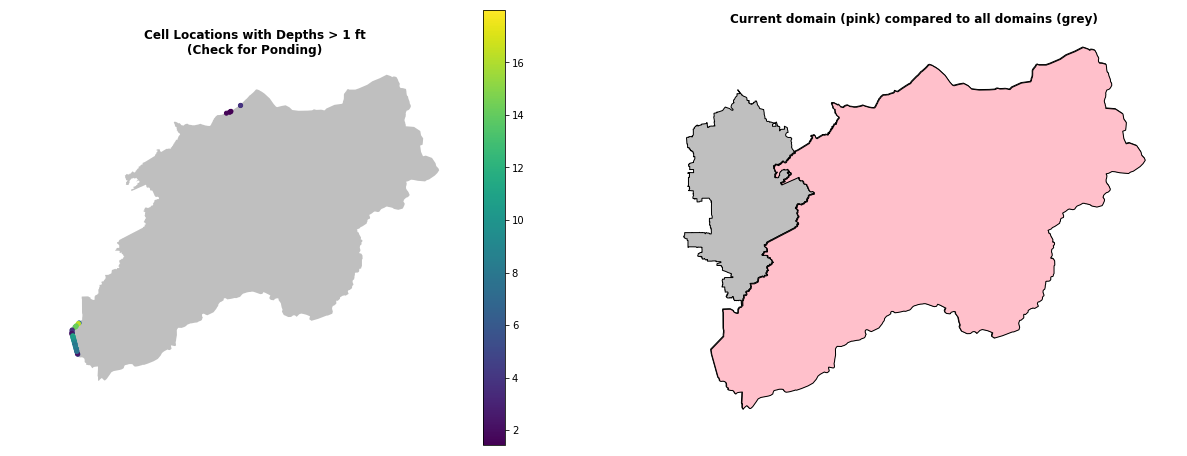

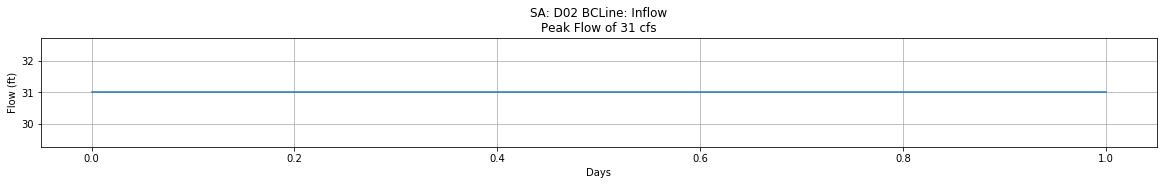

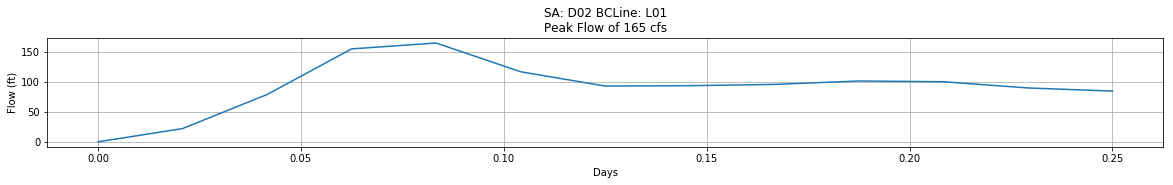

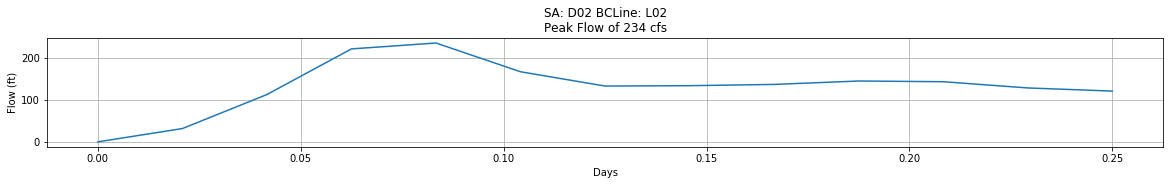

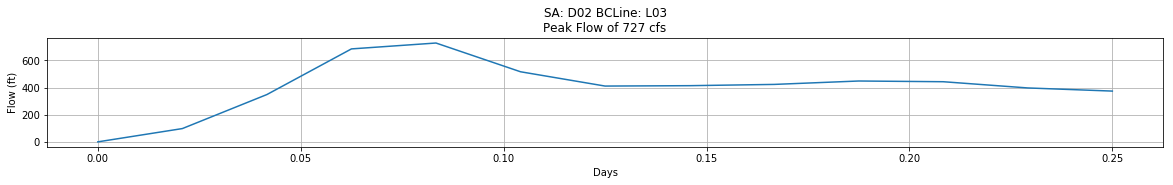

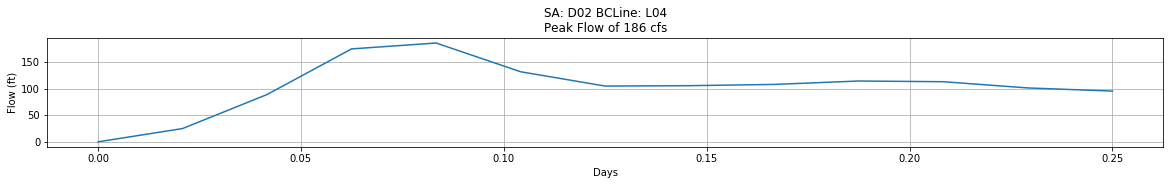

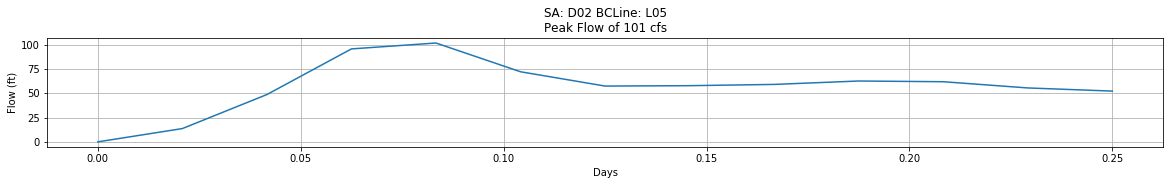

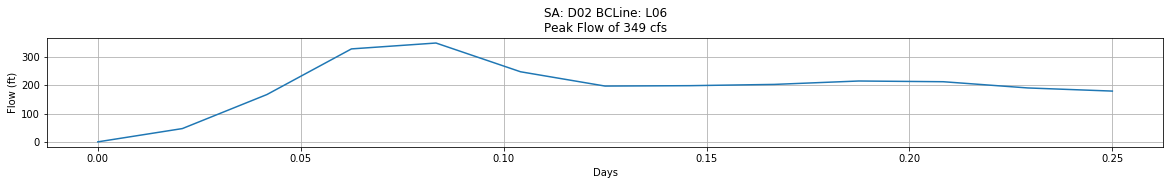

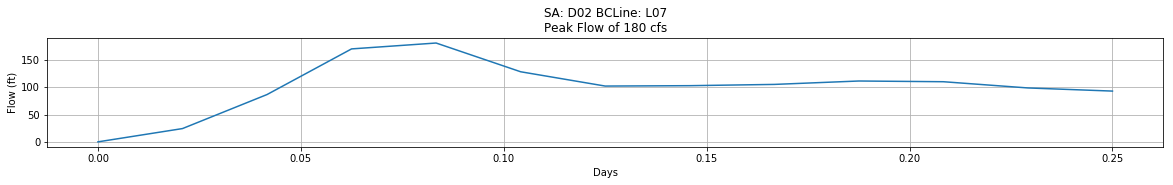

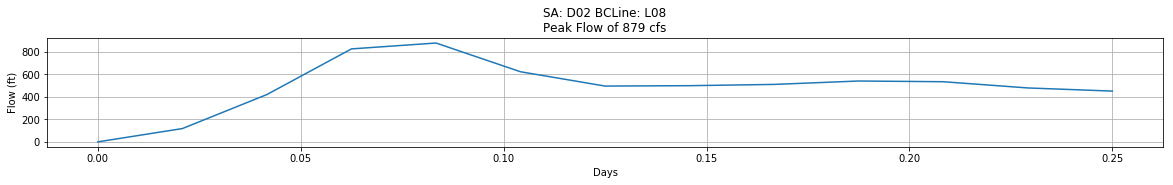

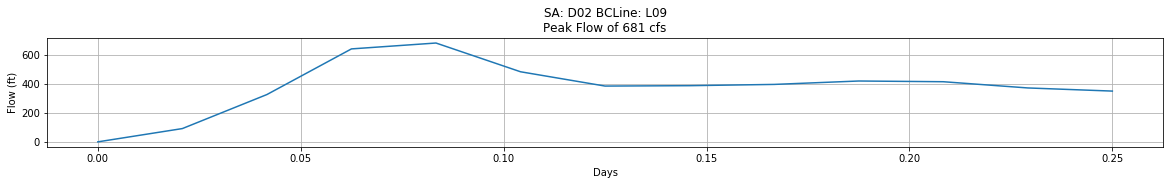

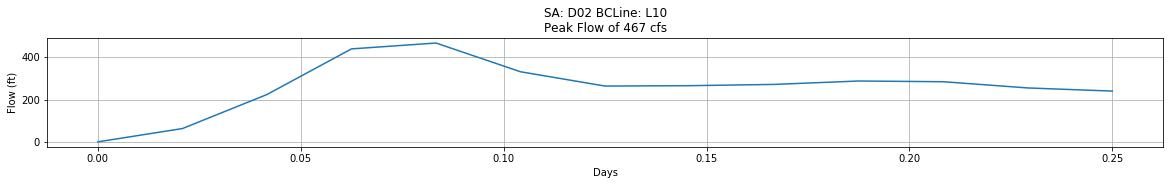

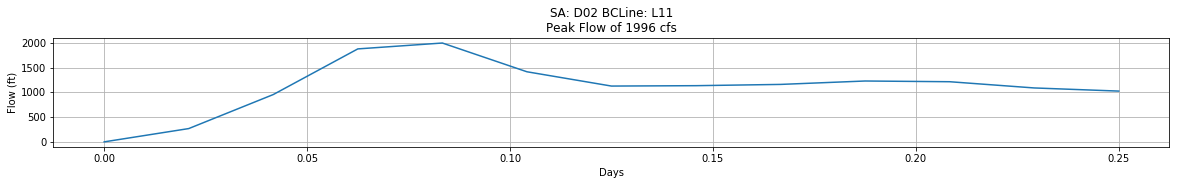

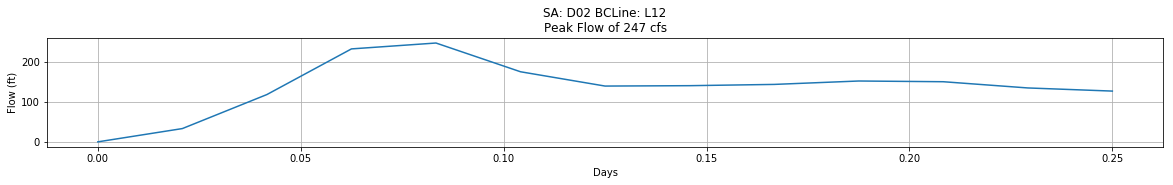

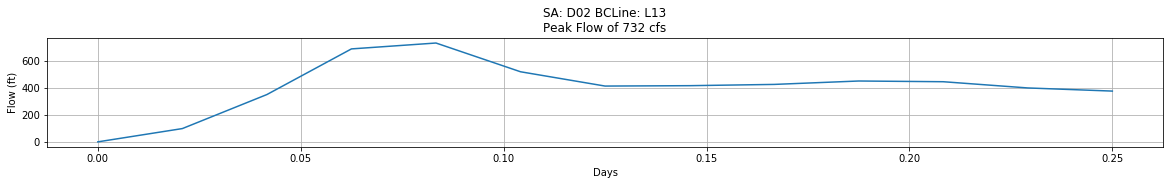

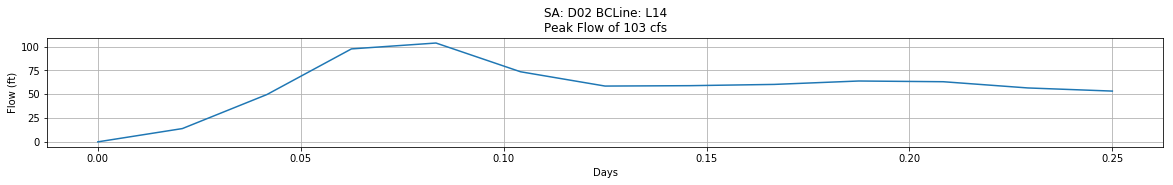

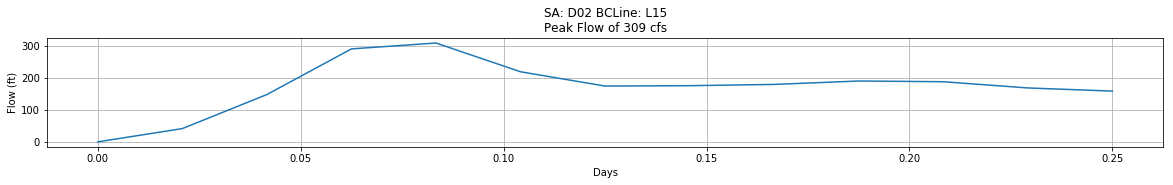

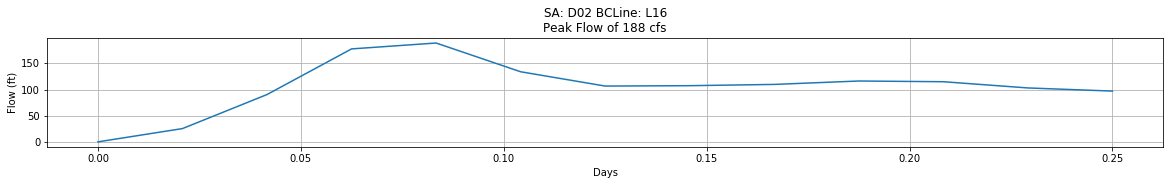

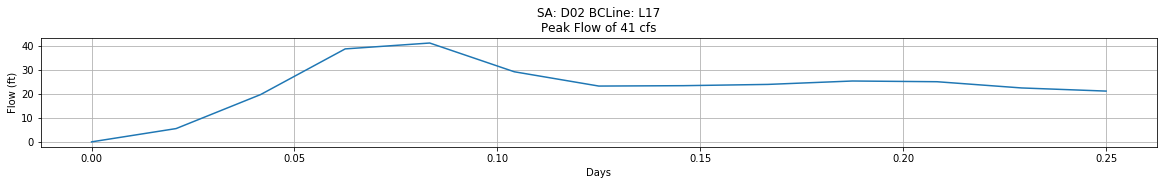

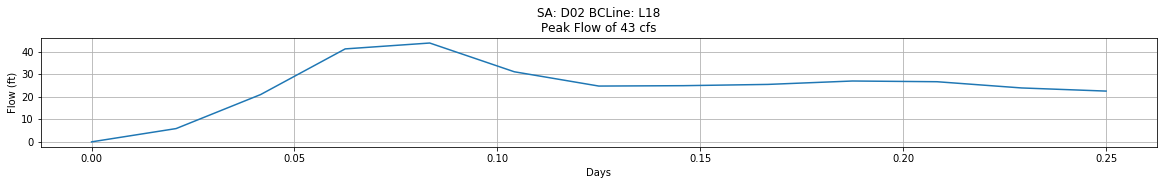

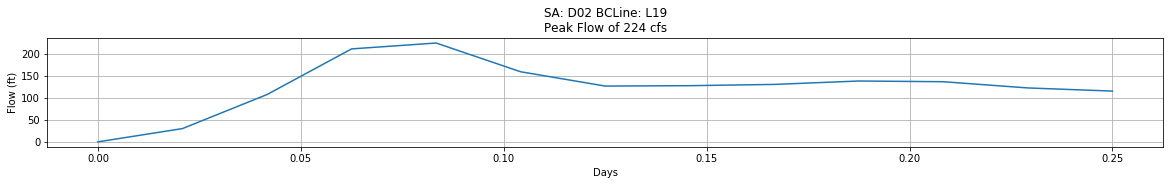

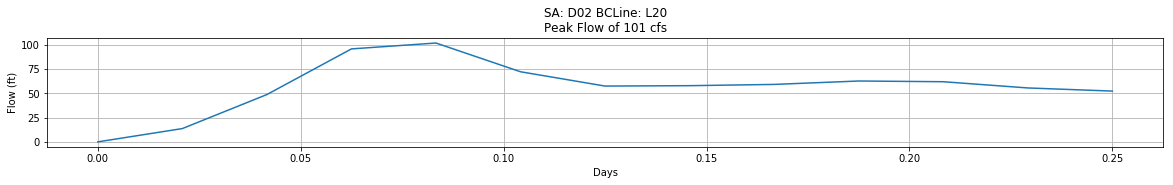

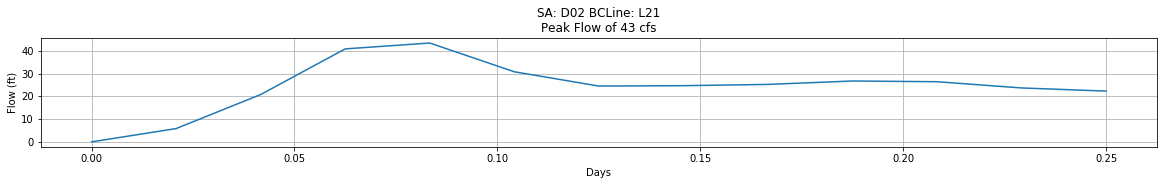

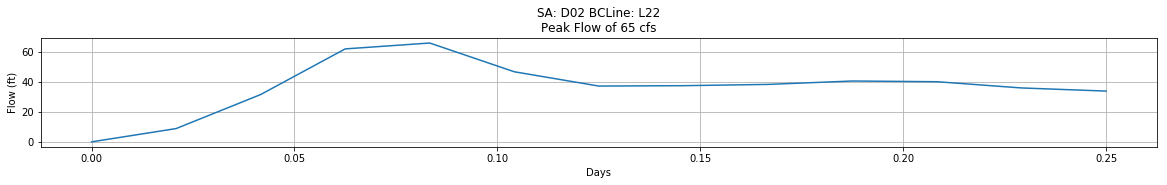

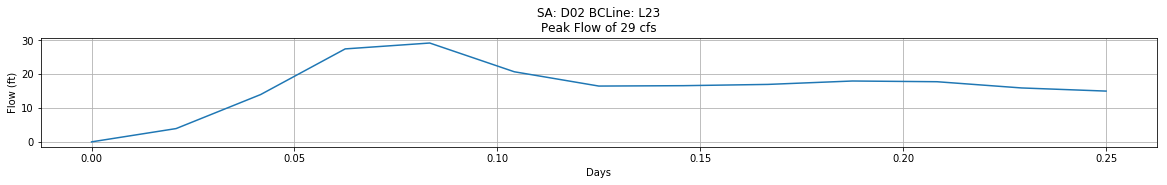

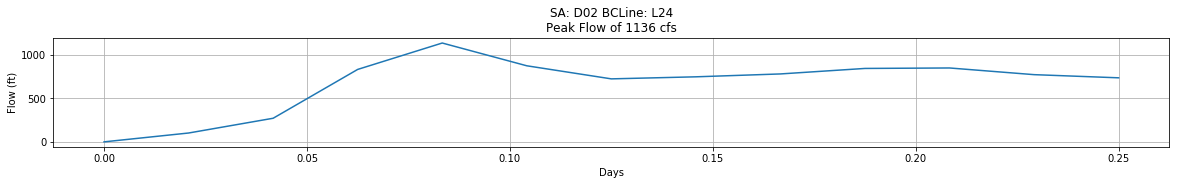

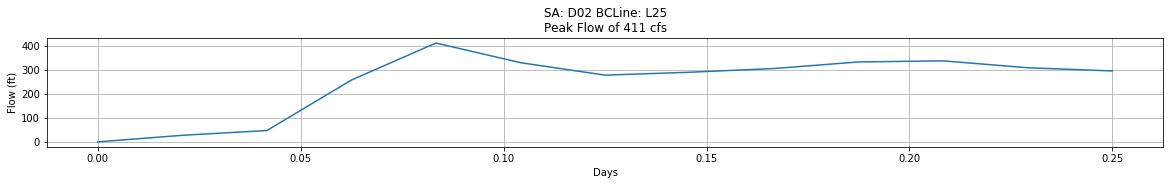

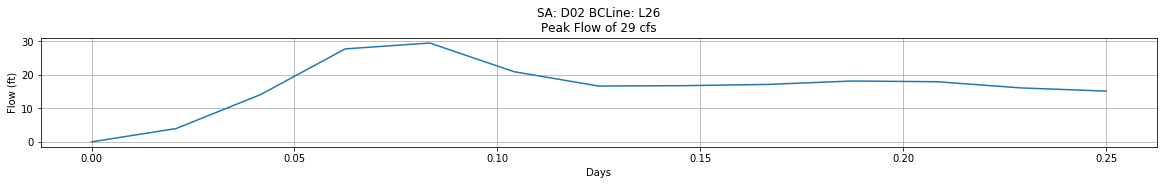

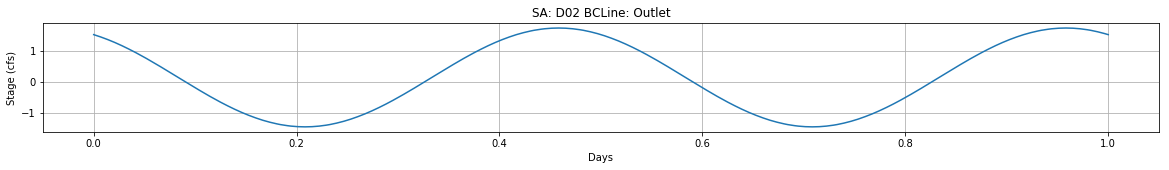

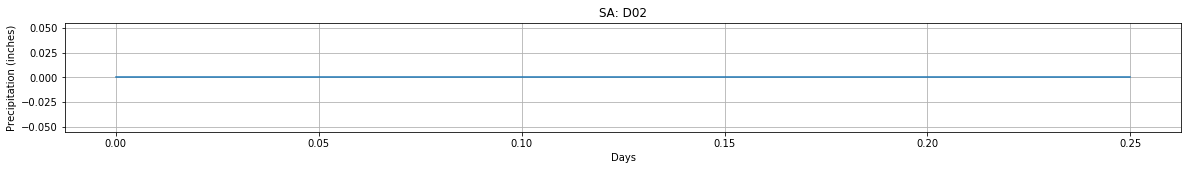

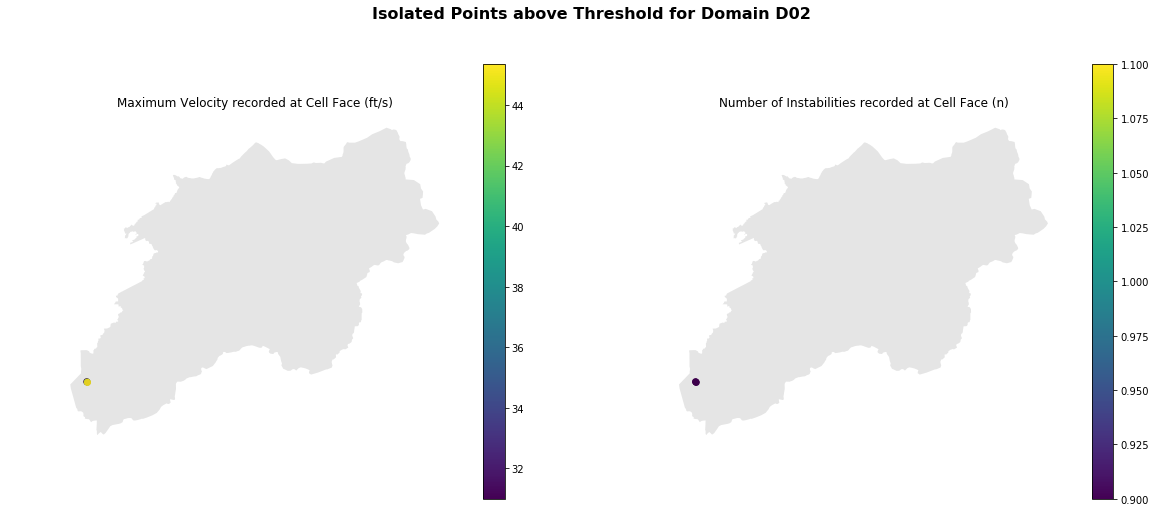

In [13]:
try:
    results_data = show_results(rasPlan.domains, model, rasPlan)
except:
    error = 'Failed to Show Results'
    global_errors.append(error)
    print(error)

try:
    sb.glue(results_data.to_json(), "json")
except:
    error = 'Failed to glue Results Data'
    global_errors.append(error)
    print(error)

### 2A. Computational Summary

In [14]:
try:
    non_nan = rasPlan.summary.replace(np.nan, "00:00:00")
    sb.glue(non_nan.to_json(), "json")
    display(HTML(rasPlan.summary.to_html()))
except:
    error = 'Failed to glue Plan Summary'
    global_errors.append(error)
    print(error)

,Results
Computation Time DSS,00:00:00
Computation Time Total,00:38:33
Maximum WSEL Error,0
Run Time Window,02SEP2019 00:06:59 to 02SEP2019 00:45:31
Solution,Unsteady Finished Successfully
Time Solution Went Unstable,NaN
Time Stamp Solution Went Unstable,Not Applicable
Vol Accounting,Volume Accounting in Acre Feet
Vol Accounting 2D Bdry,0
Vol Accounting Cell End,5852.84


In [15]:
try:
    if len(global_errors) > 1:
        sb.glue("Global Errors", global_errors)
        print('Global errors have been glued!')
    else:
        print("No global errors identified.")
except:
    print('Gluing errors failed.')

No global errors identified.


# END